<a href="https://colab.research.google.com/github/wooookim/ML-DL/blob/main/%EC%84%9C%EC%9A%B8%EC%8B%9C_%ED%8F%89%EA%B7%A0_%EA%B8%B0%EC%98%A8_%EC%98%88%EC%B8%A1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import files
uploaded = files.upload()

Saving train.csv to train.csv


In [29]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 24 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings(action='ignore')

train = pd.read_csv('/content/train.csv')
submission = pd.read_csv('/content/sample_submission.csv')

print(train.head())
print(submission.head())
# print(train.info())


# '날짜' 열을 datetime 형식으로 변환
train['일시'] = pd.to_datetime(train['일시'])
# '날짜' 열을 인덱스로 설정
train.set_index('일시', inplace=True)
# 월별로 묶기
monthly_data = train.resample('M').mean()
# 연도별로 묶기
yearly_data = train.resample('Y').mean()


# print(monthly_data)
# print(yearly_data)

# '날짜'를 인덱스로 사용하고 싶다면
# yearly_data.set_index('날짜', inplace=True)

           일시  최고기온  최저기온   일교차  강수량  평균습도  평균풍속  일조합  일사합  일조율  평균기온
0  1960-01-01   2.2  -5.2   7.4  NaN  68.3   1.7  6.7  NaN  NaN  -1.6
1  1960-01-02   1.2  -5.6   6.8  0.4  87.7   1.3  0.0  NaN  NaN  -1.9
2  1960-01-03   8.7  -2.1  10.8  0.0  81.3   3.0  0.0  NaN  NaN   4.0
3  1960-01-04  10.8   1.2   9.6  0.0  79.7   4.4  2.6  NaN  NaN   7.5
4  1960-01-05   1.3  -8.2   9.5  NaN  44.0   5.1  8.2  NaN  NaN  -4.6
           일시  평균기온
0  2023-01-01     0
1  2023-01-02     0
2  2023-01-03     0
3  2023-01-04     0
4  2023-01-05     0


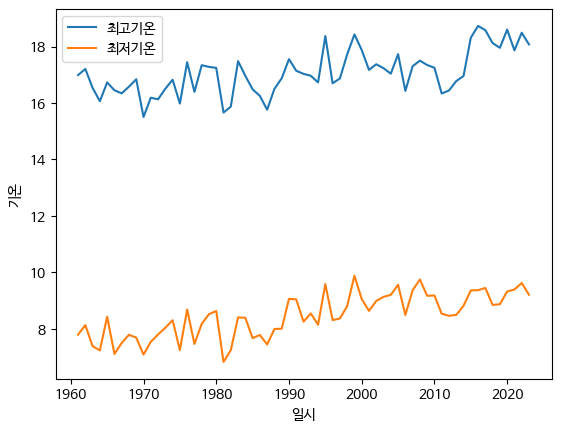

In [15]:
plt.rc('font', family='NanumBarunGothic')
plt.plot(yearly_data.index, yearly_data['최고기온'], label='최고기온')
plt.plot(yearly_data.index, yearly_data['최저기온'], label='최저기온')
plt.xlabel('일시')
plt.ylabel('기온')
plt.legend(['최고기온', '최저기온'])  # 범례 추가
plt.show()

# plt.rc('font', family='NanumBarunGothic')
# plt.plot(monthly_data.index, monthly_data['최고기온'], label='최고기온')
# plt.plot(monthly_data.index, monthly_data['최저기온'], label='최저기온')
# plt.xlabel('일시')
# plt.ylabel('기온')
# plt.legend(['최고기온', '최저기온'])  # 범례 추가
# plt.show()

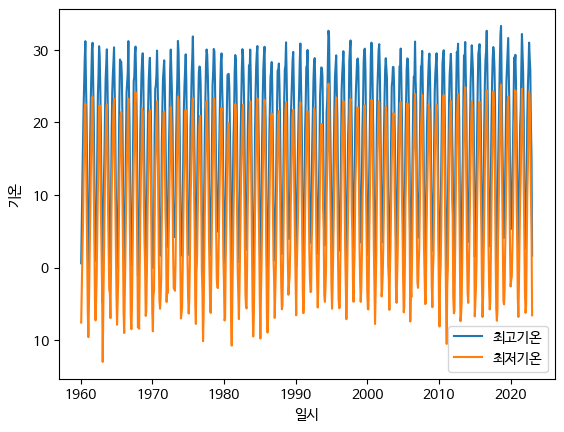

In [16]:
plt.rc('font', family='NanumBarunGothic')
plt.plot(monthly_data.index, monthly_data['최고기온'], label='최고기온')
plt.plot(monthly_data.index, monthly_data['최저기온'], label='최저기온')
plt.xlabel('일시')
plt.ylabel('기온')
plt.legend(['최고기온', '최저기온'])  # 범례 추가
plt.show()

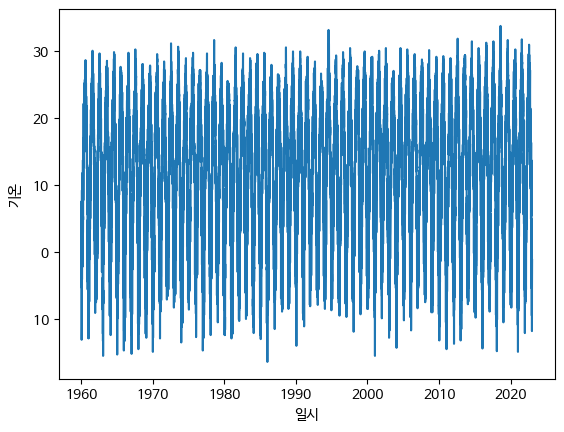

In [8]:
plt.rc('font', family='NanumBarunGothic')
plt.plot(train.index, train['평균기온'], label='평균기온')
plt.xlabel('일시')
plt.ylabel('기온')
plt.show()

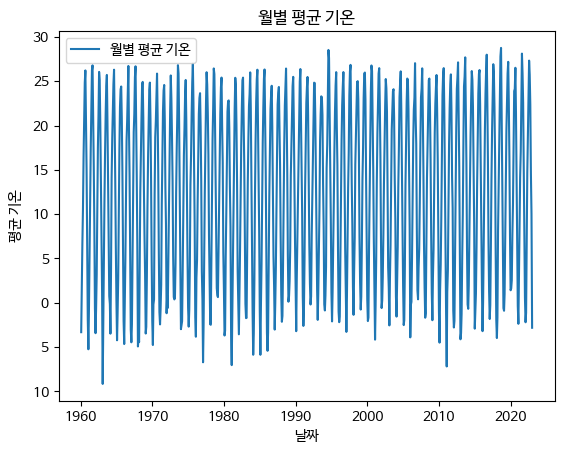

In [17]:
plt.plot(monthly_data.index, monthly_data['평균기온'], label='월별 평균 기온')
plt.xlabel('날짜')
plt.ylabel('평균 기온')
plt.title('월별 평균 기온')
plt.legend()
plt.show()

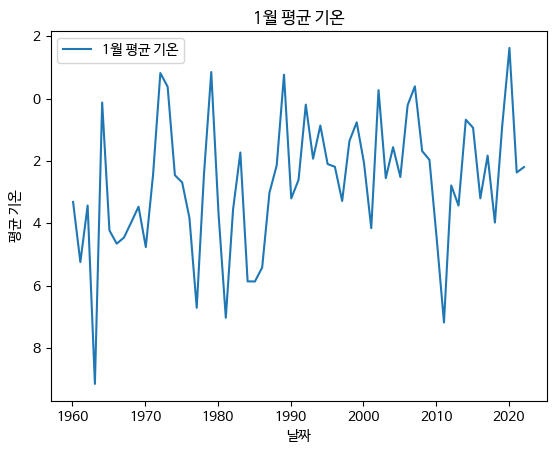

In [18]:
# 1월의 평균 기온 선 그래프
plt.plot(monthly_data[monthly_data.index.month == 1].index,
         monthly_data[monthly_data.index.month == 1]['평균기온'], label='1월 평균 기온')

plt.xlabel('날짜')
plt.ylabel('평균 기온')
plt.title('1월 평균 기온')
plt.legend()
plt.show()

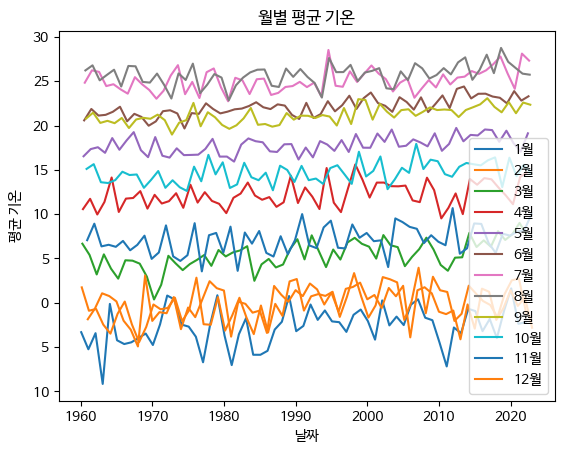

In [19]:
plt.rc('font', family='NanumBarunGothic')

# 1월부터 12월까지의 월별 선 그래프
for month in range(1, 13):
    plt.plot(monthly_data[monthly_data.index.month == month].index,
             monthly_data[monthly_data.index.month == month]['평균기온'], label=f'{month}월')

plt.xlabel('날짜')
plt.ylabel('평균 기온')
plt.title('월별 평균 기온')
plt.legend()
plt.show()


최고온도는 7월과 8월의 그래프가 유사한 형태를 보이고

최저온도는 1월이 돋보적인 형태

In [20]:
# 1월과 8월의 평균 기온 데이터 추출
january_data = monthly_data[monthly_data.index.month == 1]['평균기온']
august_data = monthly_data[monthly_data.index.month == 8]['평균기온']

# 상관관계 계산
correlation = january_data.corr(august_data)

print(f"1월과 8월의 평균 기온 상관관계: {correlation:.2f}")

1월과 8월의 평균 기온 상관관계: nan


In [23]:
print("1월 데이터:")
print(monthly_data[monthly_data.index.month == 1]['평균기온'].mean())

print("7월 데이터:")
print(monthly_data[monthly_data.index.month == 7]['평균기온'].mean())

print("8월 데이터:")
print(monthly_data[monthly_data.index.month == 8]['평균기온'].mean())


1월 데이터:
-2.6945724526369688
7월 데이터:
25.067127496159756
8월 데이터:
25.73783922171019


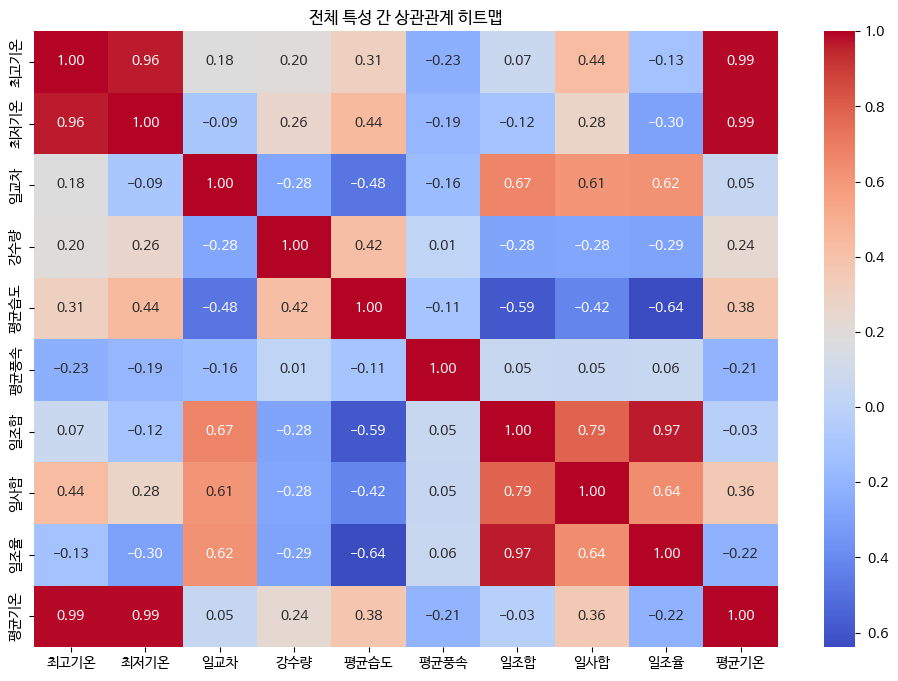

In [25]:
import seaborn as sns

# 상관행렬 계산
correlation_matrix = train.corr()

# 히트맵으로 상관관계 시각화
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('전체 특성 간 상관관계 히트맵')
plt.show()

평균기온에 일조량이 영향이 클 것으로 예상했으나 높은 상관관계를 보이지는 않음

다만 상대적인 수치로서는 일사합이 높은 편

최저, 최고 기온이 상당향 상관관계, 다음으로 평균 습도, 일사합순

Mean Squared Error: 109.33
R-squared: 0.00


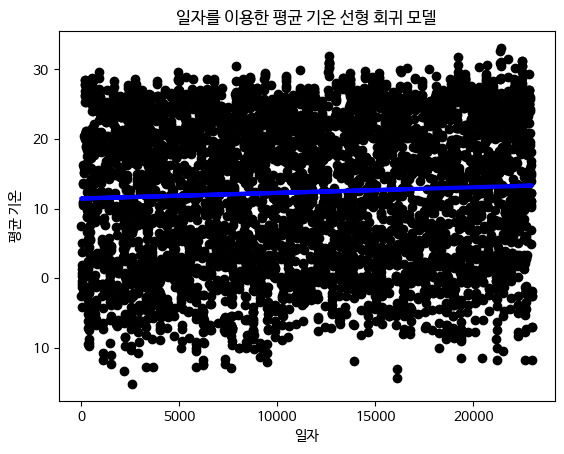

In [31]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# 데이터 불러오기
train = pd.read_csv('/content/train.csv')

# '일시' 열을 datetime 형식으로 변환
train['일시'] = pd.to_datetime(train['일시'])

# '일시'를 일자로 변환하여 사용 (예: 2023-01-01 -> 1, 2023-01-02 -> 2, ...)
train['일자'] = (train['일시'] - train['일시'].min()).dt.days + 1

# 특성과 타겟 변수 선택
X = train[['일자']]
y = train['평균기온']

# 훈련 데이터와 테스트 데이터 나누기
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 선형 회귀 모델 생성 및 학습
model = LinearRegression()
model.fit(X_train, y_train)

# 테스트 데이터에 대한 예측
y_pred = model.predict(X_test)

# 성능 평가
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse:.2f}')
print(f'R-squared: {r2:.2f}')

# 시각화
plt.scatter(X_test, y_test, color='black')
plt.plot(X_test, y_pred, color='blue', linewidth=3)
plt.xlabel('일자')
plt.ylabel('평균 기온')
plt.title('일자를 이용한 평균 기온 선형 회귀 모델')
plt.show()


ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ

김 한묶음 만들었다

Mean Squared Error: 21.50
R-squared: 0.02


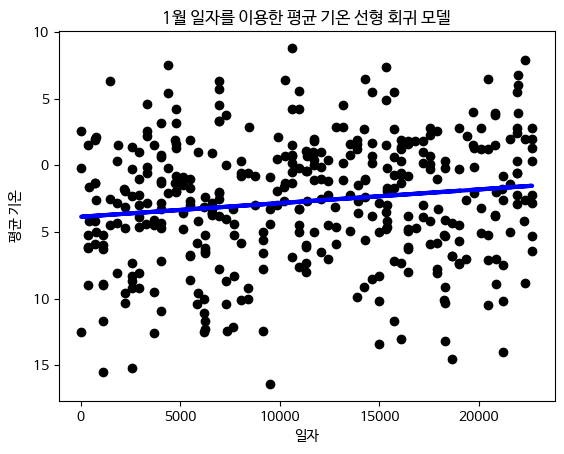

In [32]:
january_data = train[train['일시'].dt.month == 1]

# '일시'를 일자로 변환하여 사용 (예: 2023-01-01 -> 1, 2023-01-02 -> 2, ...)
january_data['일자'] = (january_data['일시'] - january_data['일시'].min()).dt.days + 1

# 특성과 타겟 변수 선택
X = january_data[['일자']]
y = january_data['평균기온']

# 훈련 데이터와 테스트 데이터 나누기
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 선형 회귀 모델 생성 및 학습
model = LinearRegression()
model.fit(X_train, y_train)

# 테스트 데이터에 대한 예측
y_pred = model.predict(X_test)

# 성능 평가
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse:.2f}')
print(f'R-squared: {r2:.2f}')

# 시각화
plt.scatter(X_test, y_test, color='black')
plt.plot(X_test, y_pred, color='blue', linewidth=3)
plt.xlabel('일자')
plt.ylabel('평균 기온')
plt.title('1월 일자를 이용한 평균 기온 선형 회귀 모델')
plt.show()

Mean Squared Error: 21.48
R-squared: 0.02


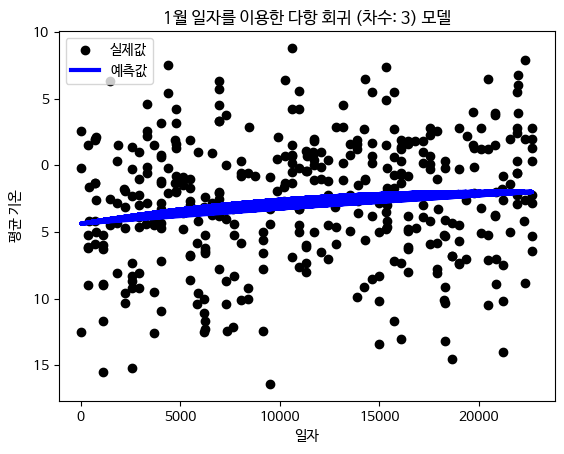

In [35]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# 데이터 불러오기
train = pd.read_csv('/content/train.csv')

# '일시' 열을 datetime 형식으로 변환
train['일시'] = pd.to_datetime(train['일시'])

# 1월 데이터만 선택
january_data = train[train['일시'].dt.month == 1]

# '일시'를 일자로 변환하여 사용 (예: 2023-01-01 -> 1, 2023-01-02 -> 2, ...)
january_data['일자'] = (january_data['일시'] - january_data['일시'].min()).dt.days + 1

# 특성과 타겟 변수 선택
X = january_data[['일자']]
y = january_data['평균기온']

# 훈련 데이터와 테스트 데이터 나누기
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 다항 특성 추가
degree = 3  # 다항식 차수 조정
poly_features = PolynomialFeatures(degree=degree)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

# 선형 회귀 모델 생성 및 학습
model = LinearRegression()
model.fit(X_train_poly, y_train)

# 테스트 데이터에 대한 예측
y_pred = model.predict(X_test_poly)

# 성능 평가
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse:.2f}')
print(f'R-squared: {r2:.2f}')

# 시각화
plt.scatter(X_test, y_test, color='black', label='실제값')
plt.plot(X_test, y_pred, color='blue', linewidth=3, label='예측값')
plt.xlabel('일자')
plt.ylabel('평균 기온')
plt.title(f'1월 일자를 이용한 다항 회귀 (차수: {degree}) 모델')
plt.legend()
plt.show()


데이터가 전체적으로 엄청나게 분포한 상태라서 선형, 다항 회귀가 의미가 없어보인다

Mean Squared Error: 8.69
R-squared: 0.60


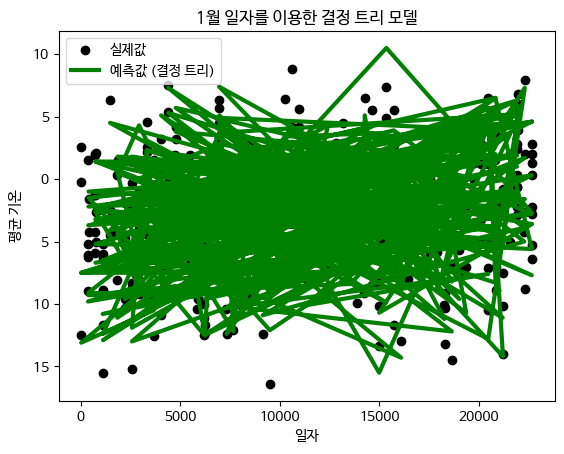

In [36]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# 데이터 불러오기
train = pd.read_csv('/content/train.csv')

# '일시' 열을 datetime 형식으로 변환
train['일시'] = pd.to_datetime(train['일시'])

# 1월 데이터만 선택
january_data = train[train['일시'].dt.month == 1]

# '일시'를 일자로 변환하여 사용 (예: 2023-01-01 -> 1, 2023-01-02 -> 2, ...)
january_data['일자'] = (january_data['일시'] - january_data['일시'].min()).dt.days + 1

# 특성과 타겟 변수 선택
X = january_data[['일자']]
y = january_data['평균기온']

# 훈련 데이터와 테스트 데이터 나누기
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 결정 트리 모델 생성 및 학습
model = DecisionTreeRegressor(random_state=42)
model.fit(X_train, y_train)

# 테스트 데이터에 대한 예측
y_pred = model.predict(X_test)

# 성능 평가
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse:.2f}')
print(f'R-squared: {r2:.2f}')

# 시각화
plt.scatter(X_test, y_test, color='black', label='실제값')
plt.plot(X_test, y_pred, color='green', linewidth=3, label='예측값 (결정 트리)')
plt.xlabel('일자')
plt.ylabel('평균 기온')
plt.title('1월 일자를 이용한 결정 트리 모델')
plt.legend()
plt.show()


낙서장이 됐다

In [38]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# 데이터 불러오기
train = pd.read_csv('/content/train.csv')

# '일시' 열을 datetime 형식으로 변환
train['일시'] = pd.to_datetime(train['일시'])

# '일시'를 일자로 변환하여 사용 (예: 2023-01-01 -> 1, 2023-01-02 -> 2, ...)
train['일자'] = (train['일시'] - train['일시'].min()).dt.days + 1

# 특성과 타겟 변수 선택
X = train[['일자']]
y = train['평균기온']

# 훈련 데이터와 테스트 데이터 나누기
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 결정 트리 모델 생성 및 학습
model = DecisionTreeRegressor(random_state=42)
model.fit(X_train, y_train)

# 테스트 데이터에 대한 예측
y_pred = model.predict(X_test)

# 성능 평가
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse:.2f}')
print(f'R-squared: {r2:.2f}')

Mean Squared Error: 5.56
R-squared: 0.95


잔디